# Implementing t-SNE on different datasets

### Blogposts followed:
- MLExplained : https://mlexplained.com/2018/09/14/paper-dissected-visualizing-data-using-t-sne-explained/
- Alexander Fabisch t-SNE notebook : https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb

In [2]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_openml
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
# creating synthetic dataset
A = np.random.normal(scale=1, size=(100, 3))
B = np.array([x for x in np.random.normal(scale=5, size=(500, 3)) if np.linalg.norm(x) > 7])

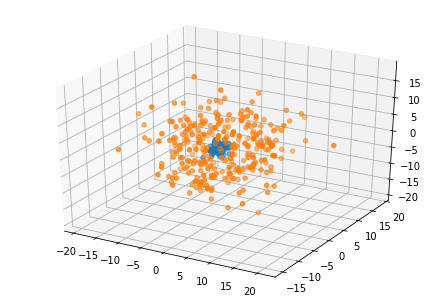

In [4]:
# visualizing data in 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2])
ax.scatter(B[:, 0], B[:, 1], B[:, 2])

In [5]:
# visualizing it after PCA
X = np.r_[A, B]
X2 = PCA(n_components=2).fit_transform(X)

In [6]:
print(X.shape); print(X2.shape)

(396, 3)
(396, 2)


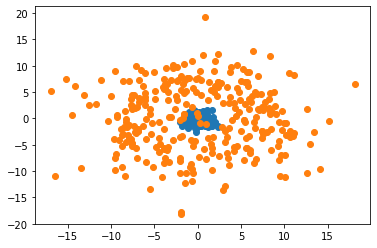

In [7]:
A2 = X2[:A.shape[0], :]
B2 = X2[A.shape[0]:, :]
plt.scatter(A2[:, 0], A2[:, 1])
plt.scatter(B2[:, 0], B2[:, 1])

Since PCA is a linear projection, it cannot capture non-linear dependencies.

In [8]:
# visualizing after t-SNE
X3 = TSNE(n_components=2).fit_transform(X)

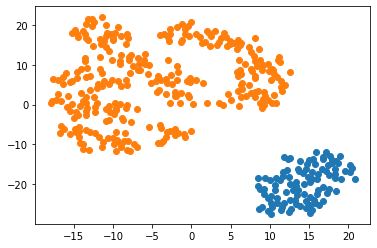

In [9]:
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

It can be seen that the points from the two clusters are well separated.

In [10]:
# running t-SNE multiple times to see how the results change
def plot_tsne():
    X3 = TSNE(n_components=2).fit_transform(X)
    A3 = X3[:A.shape[0], :]
    B3 = X3[A.shape[0]:, :]
    plt.scatter(A3[:, 0], A3[:, 1])
    plt.scatter(B3[:, 0], B3[:, 1])

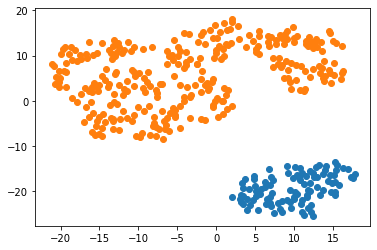

In [11]:
# 1
plot_tsne()

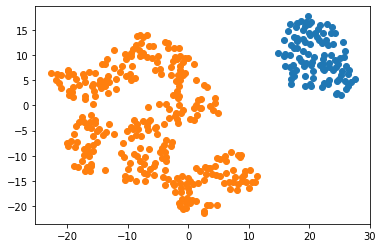

In [12]:
# 2
plot_tsne()

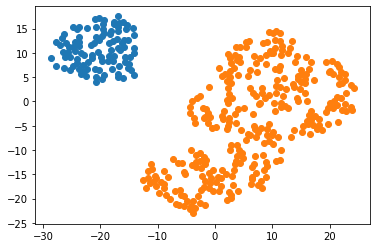

In [13]:
# 3
plot_tsne()

Results change but still are fairly reliable.

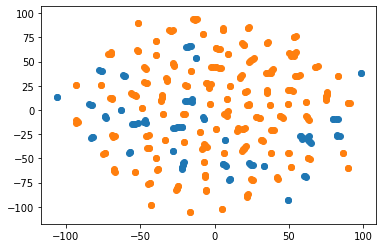

In [14]:
# experimenting with perplexity = 1
X3 = TSNE(n_components=2, perplexity=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 1 all the points are scattered with no structure. It is because perplexity-1 means you only look at one neighbor for each point, which makes it difficult to find local structure.

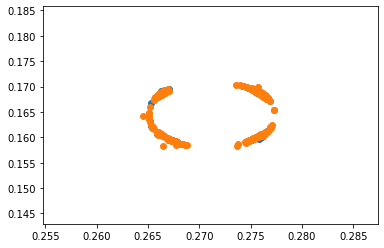

In [15]:
# experimenting with perplexity = 400
X3 = TSNE(n_components=2, perplexity=400).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

With perplexity 400 all the points are in one blob. It's because, in this case, perplexity-400 means all the points are considered as neighbors.

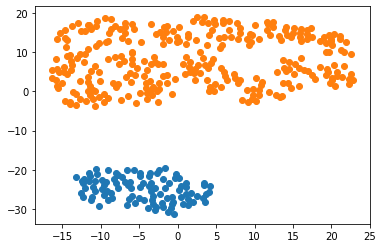

In [16]:
# experimenting with early exaggeration
# early exaggeration strengthens the ties between local points to create smaller clusters
# during initial optimization

# experimenting with early exaggeration = 1
X3 = TSNE(n_components=2, early_exaggeration=1).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

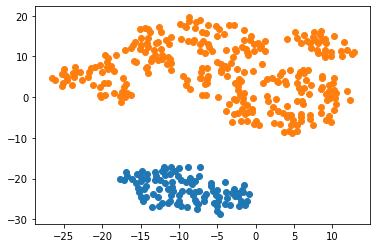

In [17]:
# experimenting with early exaggeration=500
X3 = TSNE(n_components=2, early_exaggeration=500).fit_transform(X)
A3 = X3[:A.shape[0], :]
B3 = X3[A.shape[0]:, :]
plt.scatter(A3[:, 0], A3[:, 1])
plt.scatter(B3[:, 0], B3[:, 1])

## t-SNE on Iris

In [18]:
iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

Text(0.5, 1.0, 'PCA')

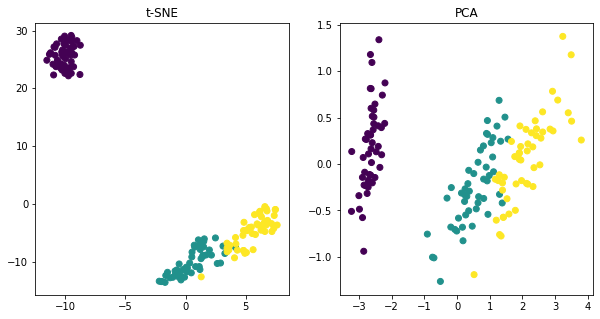

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.title('t-SNE')
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.title('PCA')

t-SNE can help us to decide whether classes are separable in some linear or nonlinear representation. Here we can see that the 3 classes of the Iris dataset can be separated quite easily. They can even be separated linearly which we can conclude from the low-dimensional embedding of the PCA.

## t-SNE on 20 newsgroups dataset

For high dimensional data, PCA is not applicable since it is a linear projection. Also many other manifold learning algorithms do not yield good visualizations either because they try to preserve the global data structure.

In [20]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vectors = TfidfVectorizer().fit_transform(newsgroups.data)

In [21]:
# The repr module provides a means for producing object representations 
print(repr(vectors))

<2034x34118 sparse matrix of type '<class 'numpy.float64'>'
	with 323433 stored elements in Compressed Sparse Row format>


For high-dimensional sparse data it is helpful to first reduce the dimensions to 50 dimensions with TruncatedSVD and then perform t-SNE. This will usually improve the visualization.

In [22]:
X_reduced = TruncatedSVD(n_components=50, random_state=42).fit_transform(vectors)

In [23]:
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2034 samples in 0.003s...
[t-SNE] Computed neighbors for 2034 samples in 0.523s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2034
[t-SNE] Computed conditional probabilities for sample 2000 / 2034
[t-SNE] Computed conditional probabilities for sample 2034 / 2034
[t-SNE] Mean sigma: 0.107990
[t-SNE] Computed conditional probabilities in 0.159s
[t-SNE] Iteration 50: error = 73.7713852, gradient norm = 0.1139795 (50 iterations in 1.548s)
[t-SNE] Iteration 100: error = 73.2661514, gradient norm = 0.1284857 (50 iterations in 1.371s)
[t-SNE] Iteration 150: error = 73.5527267, gradient norm = 0.1004404 (50 iterations in 1.226s)
[t-SNE] Iteration 200: error = 73.6003799, gradient norm = 0.0938824 (50 iterations in 1.345s)
[t-SNE] Iteration 250: error = 73.6482620, gradient norm = 0.0875626 (50 iterations in 1.511s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.648262
[t-SNE] Iteration 300: err

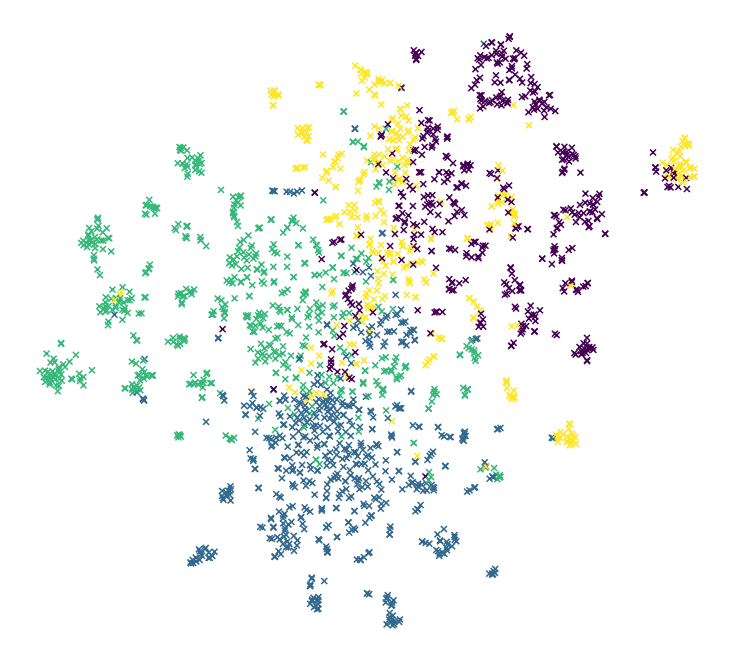

In [24]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=newsgroups.target, marker="x")

## MNIST Dataset

In [25]:
# Load MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data / 255.0, mnist.target

In [26]:
# Create subset and reduce to first 50 dimensions
indices = np.arange(X.shape[0])
random.shuffle(indices)
n_train_samples = 5000

In [27]:
X_pca = PCA(n_components=50).fit_transform(X)
X_train = X_pca[indices[:n_train_samples]]
y_train = y[indices[:n_train_samples]]

In [28]:
# Plotting function
matplotlib.rc('font', **{'family' : 'sans-serif',
                         'weight' : 'bold',
                         'size'   : 18})
matplotlib.rc('text', **{'usetex' : True})

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    plt.title("\\textbf{MNIST dataset} -- Two-dimensional "
          "embedding of 70,000 handwritten digits with %s" % name)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

    if min_dist is not None:
        from matplotlib import offsetbox
        shown_images = np.array([[15., 15.]])
        indices = np.arange(X_embedded.shape[0])
        random.shuffle(indices)
        for i in indices[:5000]:
            dist = np.sum((X_embedded[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist:
                continue
            shown_images = np.r_[shown_images, [X_embedded[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(X[i].reshape(28, 28),
                                      cmap=cm.gray_r), X_embedded[i])
            ax.add_artist(imagebox)


In [29]:
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.007s...
[t-SNE] Computed neighbors for 5000 samples in 2.655s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.048636
[t-SNE] Computed conditional probabilities in 0.336s
[t-SNE] Iteration 50: error = 85.8926697, gradient norm = 0.0031799 (50 iterations in 3.659s)
[t-SNE] Iteration 100: error = 80.1777267, gradient norm = 0.0015961 (50 iterations in 3.790s)
[t-SNE] Iteration 150: error = 80.0228424, gradient norm = 0.0003947 (50 iterations in 2.535s)
[t-SNE] Iteration 200: error = 80.0151825, gradient norm = 0.0002916 (50 iterations in 2.533s)
[t-SNE] Iteration 250: error = 80.0076447, gradient norm = 0.000165

Check [this link](https://nbviewer.jupyter.org/urls/gist.githubusercontent.com/AlexanderFabisch/1a0c648de22eff4a2a3e/raw/59d5bc5ed8f8bfd9ff1f7faa749d1b095aa97d5a/t-SNE.ipynb) for the plot.

## Visualizing Word2Vec Word Embeddings using t-SNE

### 1. Visualizing similar words from Google News

In [30]:
import gensim

In [ ]:
model_gn = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)